 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt 
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
path_whales_returns=Path("Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whales_returns=pd.read_csv(path_whales_returns,index_col="Date",parse_dates=True, infer_datetime_format=True)

whales_returns.index=whales_returns.index.strftime('%Y-%m-%d')

In [4]:
# Count nulls
whales_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whales_returns=whales_returns.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [25]:
# Reading algorithmic returns
path_algo_portfolios=Path("Resources/algo_returns.csv")

algorithms_returns=pd.read_csv(path_algo_portfolios, index_col="Date", parse_dates=True, infer_datetime_format=True)

algorithms_returns.index=algorithms_returns.index.strftime('%Y-%m-%d')

In [7]:
# Count nulls
algorithms_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls 
algorithms_returns.dropna(axis=0, inplace=True)


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
path_SP_TSX_60=Path("Resources/sp_tsx_history.csv")

sp_tsx_60=pd.read_csv(path_SP_TSX_60, index_col="Date", parse_dates=True, infer_datetime_format=True)

sp_tsx_60.index=sp_tsx_60.index.strftime('%Y-%m-%d')

In [10]:
# Check Data Types
sp_tsx_60.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_tsx_60["Close"]=sp_tsx_60["Close"].str.replace("$","")

sp_tsx_60["Close"]=sp_tsx_60["Close"].str.replace(",","")

sp_tsx_60["Close"]=sp_tsx_60["Close"].astype("float")

C:\Users\JUANTR~1\AppData\Local\Temp/ipykernel_14304/2276930291.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_60["Close"]=sp_tsx_60["Close"].str.replace("$","")


In [12]:
# Calculate Daily Returns
sp_tsx_60["Close"]=sp_tsx_60["Close"].pct_change()

In [13]:
# Drop nulls
sp_tsx_60=sp_tsx_60.dropna()

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_60.rename(columns={"Close": "tsx60"}, inplace=True)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
portfolios=pd.concat([whales_returns,algorithms_returns, sp_tsx_60], axis=1,join="inner")

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

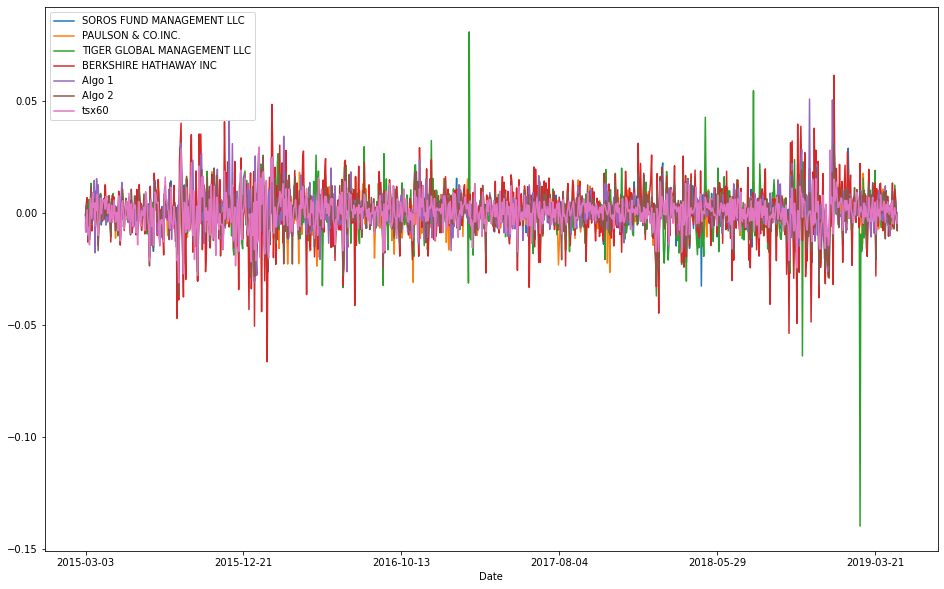

In [16]:
# Plot daily returns of all portfolios
portfolios.plot(figsize=(16,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

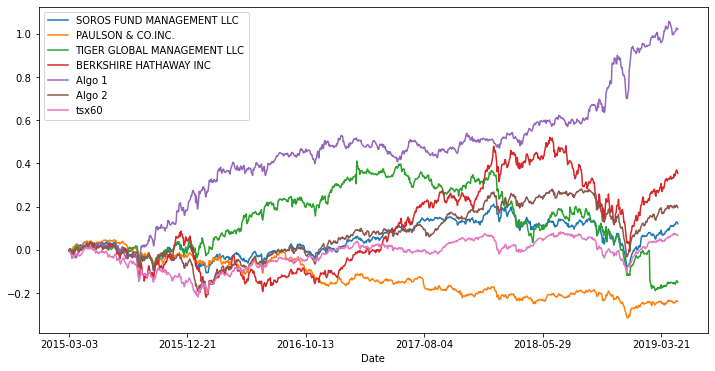

In [17]:
# Calculate cumulative returns of all portfolios
portfolios_cumreturns = (1+ portfolios).cumprod()-1

# Plot cumulative returns
portfolios_cumreturns.plot(figsize=(12,6))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

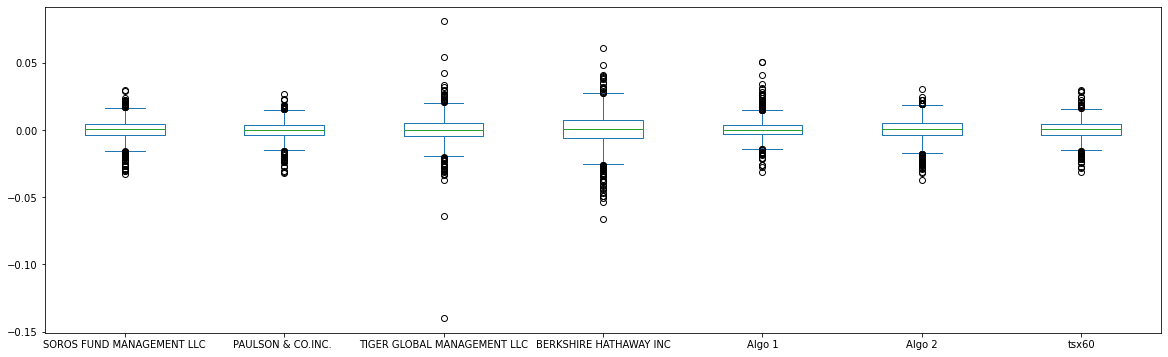

In [18]:
# Box plot to visually show risk
portfolios.plot(kind="box", figsize=(20,6))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
std_portfolios=portfolios.std().to_frame()

std_portfolios.rename(columns={0:"daily return deviations"}, inplace=True)

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
std_sp_tsx=portfolios["tsx60"].std()

# Determine which portfolios are riskier than the S&P TSX 60 
std_portfolios[std_portfolios["daily return deviations"]>std_sp_tsx]         

,daily return deviations
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


- Except for Paulson & co. all portfolios were riskier than the benchmark index throughout thisevaluation period as reflected in their higher deviations from daily mean returns

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
volatility=std_portfolios* np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 days rolling standard deviation'}, xlabel='Date', ylabel='percentage'>

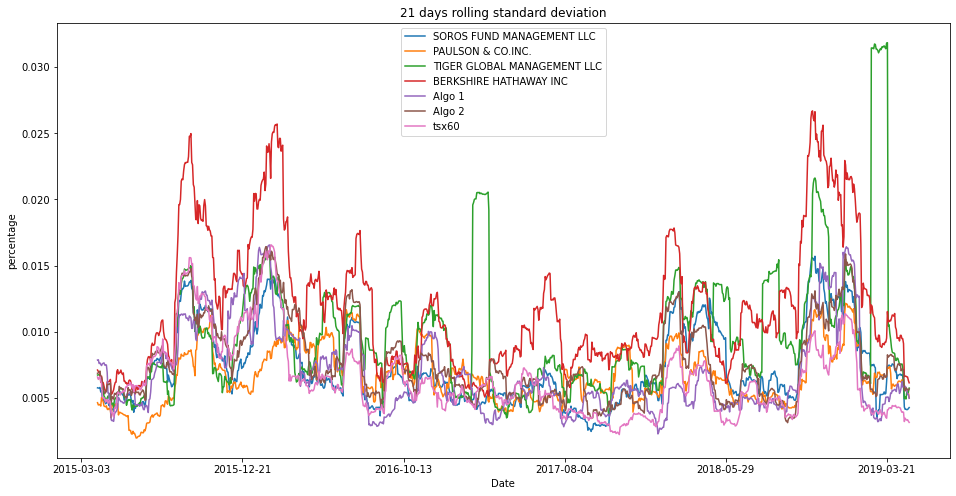

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21days_std =portfolios.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_21days_std.plot(figsize=(16,8), title="21 days rolling standard deviation", ylabel='percentage')

### Calculate and plot the correlation

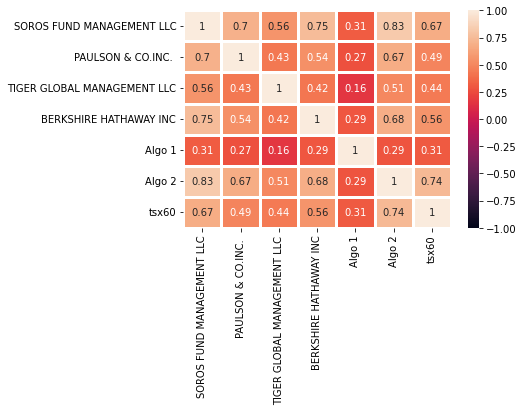

In [23]:
# Calculate the correlation
daily_returns_correlations=portfolios.corr()

# Display de correlation matrix
correlation_matrix= sns.heatmap(daily_returns_correlations, vmin=-1, vmax=1,linewidths=3, annot=True)

- It's worth noting that Algorithm 1 returns are the least correlated to the broad market represented by the tsx60. Thus it may be a strategy to consider in order to further diversify a market portfolio.

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [24]:
# Calculate covariance of a single portfolio
covariance= portfolios["BERKSHIRE HATHAWAY INC"].cov(all_portfolios['tsx60'])

# Calculate variance of S&P TSX
variance=portfolios["tsx60"].var()

# Computing beta
beta_berkshire_hathaway=covariance/variance

# Plot beta trend
rolling_variance_tsx60 = portfolios["tsx60"].rolling(window=30).var()

rolling_covariance= portfolios['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(portfolios['tsx60'])

rolling_beta= rolling_covariance/rolling_variance_tsx60

rolling_beta.plot(figsize=(16,10), title="Beta trend", ylabel="30 day rolling beta")

NameError: name 'all_portfolios' is not defined

- The 30 day rolling beta plot depicts the dynamic relationship between the canadian large cap market index and Berkshire Hathaway's stock returns. The strength of the relationship have remained positive throughout the evaluation period however it's experienced significant volatility. We can see a low measurement of under 0.5 and a high measurement of 2.0+

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window
exp_berkshire = all_portfolios["BERKSHIRE HATHAWAY INC"].ewm(halflife=21)

exp_variance_tsx60 = all_portfolios["tsx60"].var()

exp_covariance= exp_berkshire.cov(all_portfolios["tsx60"])

exp_beta= rolling_covariance/rolling_variance_tsx60

exp_beta.plot(figsize=(16,10), ylabel="exponential beta")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratio=round((all_portfolios.mean()*252) / (all_portfolios.std() * np.sqrt(252)),2).sort_values(ascending=False)

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Portfolios Sharpe ratios", figsize=(12,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

- Algorithm 1 strategy substantially outperformed the market represented by the tsx60 and also outpaced the remaining portfolios as evidenced by its higher cumulative return. Its higher sharpe ratio indicates that its returns were earned in a more efficient way than the rest of the strategies as well.
- Algorithm 2 did not yield as impressive a return when compared to Algorithm 1 strategy. Nevertheless, its cumulative returns were better than most other strategies without taking into account that of Berkshire Hathaway. Also, with the exception of Berkshire Hathaway and Algorithm 1, it earned a higher return per unit of risk than all other portfolios as evidenced by its higher sharpe ratio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [26]:
# Reading data from 1st stock
ABM_path = Path("../ABM historical prices.csv")

ABM = pd.read_csv(ABM_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

ABM.rename(columns={"Close": "ABM"}, inplace=True)

ABM.index= ABM.index.strftime('%Y-%m-%d')

In [ ]:
# Reading data from 2nd stock
Chesapeake_path=Path("../Chesapeake historical prices.csv")

Chesapeake=pd.read_csv(Chesapeake_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

Chesapeake.rename(columns={"Close": "CHK"}, inplace=True)

Chesapeake.index = Chesapeake.index.strftime('%Y-%m-%d')


In [ ]:
# Reading data from 3rd stock
Airbus_path=Path("../Airbus historical prices.csv")

Airbus=pd.read_csv(Airbus_path,index_col="Date", parse_dates=True, infer_datetime_format=True)

Airbus.rename(columns={"Close": "AIR"}, inplace=True)

Airbus.index = Airbus.index.strftime('%Y-%m-%d')

In [ ]:
# Combine all stocks in a single DataFrame
custom_portfolio= pd.concat([Airbus,Chesapeake,ABM], axis=1, join="inner")


In [ ]:
# Reset Date index
custom_portfolio.head()

- Note: Dates were reset for each security on the prior cells. Please see results in the display above.

In [ ]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio.columns=["AIR","CHK","ABM"]

- Note: This instructions was completed above for each security. Nevertheless, here is an alternative way to modifying column names as well.

In [ ]:
# Calculate daily returns
custom_portfolio_returns=custom_portfolio.pct_change()

# Drop NAs
custom_portfolio_returns=custom_portfolio_returns.dropna(axis=0)

# Display sample data
custom_portfolio_returns.head()

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3,1/3,1/3]

# Calculate portfolio return
custom_portfolio_weighted_returns=custom_portfolio_returns.dot(weights)

# Display sample data
custom_portfolio_weighted_returns=custom_portfolio_weighted_returns.to_frame()
custom_portfolio_weighted_returns.rename(columns={ 0:"custom portfolio returns"}, inplace=True)
custom_portfolio_weighted_returns.head()



- Note: We assume securities as equally weighted and calculate the daily returns for the entire portfolio

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios=pd.concat([custom_portfolio_weighted_returns,portfolios],axis=1)

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolios.dropna(inplace=True)

- Note: The custom portfolio daily returns are attached in a dataframe with the rest of the portfolios daily retuns to enable a comparison

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`  
std_combined_portfolios=combined_portfolios.std()

volatility_combined_portfolios= std_combined_portfolios * np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation
rolling_std_combined_portfolios= combined_portfolios.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std_combined_portfolios.plot(figsize=(20,10),title="21 days rolling standard deviation")

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation
correlation_combined_portfolios= combined_portfolios.corr()

sns.heatmap(correlation_combined_portfolios, linewidth=4, annot=True, vmin=-1,vmax=1)   

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta
version_2_custom_portfolio=pd.concat([combined_portfolios["ABM"],combined_portfolios["CHK"],combined_portfolios["AIR"]], axis=1, join="inner")

version_2_custom_portfolio_returns=version_2_custom_portfolio.dot(weights)

rolling_covariance_custom_portfolio= version_2_custom_portfolio_returns.rolling(window=60).cov(combined_portfolios['tsx60']) 

rolling_variance_tsx60_60days = combined_portfolios["tsx60"].rolling(window=60).var()

rolling_beta_custom_portfolio= rolling_covariance_custom_portfolio/rolling_variance_tsx60_60days

rolling_beta_custom_portfolio.plot(figsize=(16,10), title="Beta trend", ylabel="60 day rolling beta")

- Note: To ensure the series of (per security) observations in my custom portfolio equates the number of observation of the tsx 60 series, I created a new dataframe for my custom portfolio ("version 2") based on the number observations (per security) captured in the combined portfolios dataframe. This will make the custom portfolio returns comparable to the tsx60's.

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_combined_portfolios=round((combined_portfolios.mean()*252)/(volatility_combined_portfolios),2).sort_values(ascending=False)

In [ ]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios_combined_portfolios.plot(kind="bar", title="Sharpe Ratios Combined Portfolios", figsize=(15,8))

### How does your portfolio do?

Write your answer here!

- My custom portfolio of 3 securities yielded more efficient returns than most portfolios with the exception of Algorihtm 1. This means that it earned more relative to its risk exposure. This is evidenced by a higher sharpe ratio. This is notable as you would expect more diversified portfolios like the tsx60 to be more efficient than a highly concentrated 3-securities portfolio. 